In [ ]:
!pip install lightgbm

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Read in the data
df = pd.read_csv('supervised_no_pca.csv', index_col=None)

In [30]:
df=df.rename(columns={'Unnamed: 0':'date'})

In [31]:
df.set_index('date', inplace=True)

In [32]:
df= pd.get_dummies(df, columns=['sentiment'])

In [33]:
df['label'] = np.where(df["S&P 500 Daily Movement"].str.contains('neg'), -1, 1)

In [34]:
df = df.drop(columns='S&P 500 Daily Movement')

In [35]:
df.index = pd.to_datetime(df.index)

In [36]:
df

,Interest Score,HST,XTN,total_cases,new_cases,total_deaths,new_deaths,sentiment_negative,sentiment_neutral,sentiment_positive,label
date,,,,,,,,,,,
2020-03-03,7,-0.053440,-0.028093,74.0,19.0,7.0,1.0,0,1,0,-1
2020-03-04,7,0.007057,0.031684,107.0,33.0,11.0,4.0,0,1,0,1
2020-03-05,7,-0.078486,-0.065194,184.0,77.0,12.0,1.0,0,1,0,-1
2020-03-06,7,0.023574,-0.005379,237.0,53.0,14.0,2.0,0,1,0,-1
2020-03-09,30,-0.103269,-0.085571,594.0,75.0,22.0,1.0,0,1,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,70,-0.002987,0.011670,28233518.0,56159.0,502465.0,1325.0,0,1,0,-1
2021-02-23,70,-0.005992,0.006627,28305788.0,72270.0,504747.0,2282.0,1,0,0,1
2021-02-24,70,0.031947,0.016336,28380537.0,74749.0,507916.0,3169.0,0,1,0,1


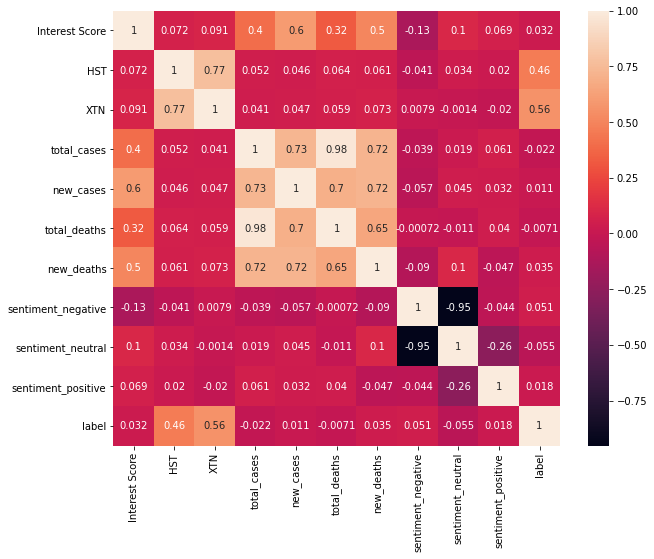

In [37]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corrMatrix, annot=True, ax=ax);

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=0.30, random_state=101)

In [39]:
lgbm = LGBMClassifier(objective='Binary', random_state=5)

In [ ]:
## hyperparameter tuning
param_grid = {'n_estimators': [1, 10, 20, 30, 40], 'n_jobs': [1,5,10,15]}
grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)
grid.best_estimator_

In [40]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [41]:
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')

### LGBM Classifier

In [42]:
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective='Binary',
               random_state=5, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [43]:
predictions = lgbm.predict(X_test)

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.67      0.67      0.67        33
           1       0.74      0.74      0.74        42

    accuracy                           0.71        75
   macro avg       0.70      0.70      0.70        75
weighted avg       0.71      0.71      0.71        75



## CLF

In [45]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [46]:
predictions = clf.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.62      0.73      0.67        33
           1       0.75      0.64      0.69        42

    accuracy                           0.68        75
   macro avg       0.68      0.69      0.68        75
weighted avg       0.69      0.68      0.68        75



In [48]:
y = clf.feature_importances_

[Text(0, 0, 'Interest Score'),
 Text(0, 0, 'HST'),
 Text(0, 0, 'XTN'),
 Text(0, 0, 'total_cases'),
 Text(0, 0, 'new_cases'),
 Text(0, 0, 'total_deaths'),
 Text(0, 0, 'new_deaths'),
 Text(0, 0, 'sentiment_negative'),
 Text(0, 0, 'sentiment_neutral'),
 Text(0, 0, 'sentiment_positive')]

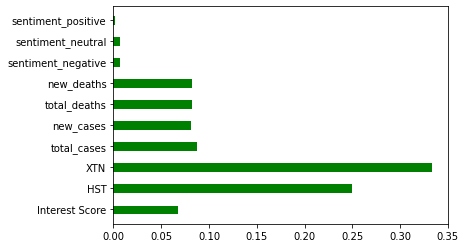

In [49]:
col_name=list(X_test.columns)
    
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col_name, minor=False)

## KNN

In [50]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')

In [51]:
predictions = knn.predict(X_test)

In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.33      0.24      0.28        33
           1       0.51      0.62      0.56        42

    accuracy                           0.45        75
   macro avg       0.42      0.43      0.42        75
weighted avg       0.43      0.45      0.44        75

